In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arnav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arnav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arnav\AppData\Roaming\nltk_data...


True

In [4]:
import pandas as pd
import numpy as np

from tokenization import make_numerical_vector

X_train, X_test, Y_train, Y_test = make_numerical_vector("C:\\Users\\arnav\\OneDrive\\Desktop\\Coding Projects\\AI_PROJ_ONE\\IMDB_Dataset.csv")

0        [One, reviewer, mentioned, watching, 1, Oz, ep...
1        [wonderful, little, production, br, br, filmin...
2        [thought, wonderful, way, spend, time, hot, su...
3        [Basically, 's, family, little, boy, Jake, thi...
4        [Petter, Mattei, 's, ``, Love, Time, Money, ''...
                               ...                        
49995    [thought, movie, right, good, job, n't, creati...
49996    [Bad, plot, bad, dialogue, bad, acting, idioti...
49997    [Catholic, taught, parochial, elementary, scho...
49998    ['m, going, disagree, previous, comment, side,...
49999    [one, expects, Star, Trek, movie, high, art, f...
Name: tokens, Length: 50000, dtype: object
[1 1 1 ... 0 0 0]
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4901928 stored elements and shape (50000, 10000)>
  Coords	Values
  (0, 6365)	0.018895411941170396
  (0, 7515)	0.06173505995280742
  (0, 5624)	0.05974183387520154
  (0, 9622)	0.07032768085458828
  (0, 6557)	0.4862869939562654
  

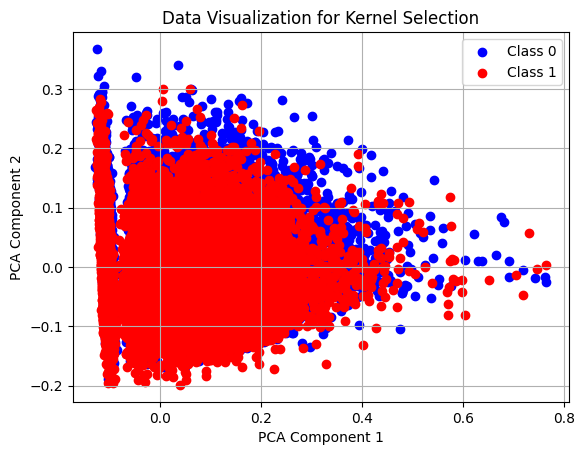

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from plotting import plot_data_points

plot_data_points(X_train, Y_train)

In [6]:
from sklearn import svm
from sklearn.metrics import accuracy_score

svm_model_linear = svm.SVC(kernel='linear')  # using kernal = linear as from the 
svm_model_linear.fit(X_train, Y_train)
print("Linear accuracy:", accuracy_score(Y_test, svm_model_linear.predict(X_test)))

Linear accuracy: 0.8944


In [7]:
svm_model_rbf = svm.SVC(kernel='rbf')  # using kernal = linear as from the 
svm_model_rbf.fit(X_train, Y_train)
print("Linear accuracy:", accuracy_score(Y_test, svm_model_rbf.predict(X_test)))

Linear accuracy: 0.8978


In [11]:
from sklearn.model_selection import GridSearchCV

# Step 1: Define the base model
model_linear = svm.SVC(kernel='linear')

# Step 2: Define the grid of 'C' values to try
param_grid = {
    'C': [0.1, 1, 10]  # You can adjust this range
}

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator = model_linear,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs=-1
)

# Step 4: Fit the grid search on your training data
grid_search.fit(X_train, Y_train)

# Step 5: Get the best model and score
print("Best C value:", grid_search.best_params_['C'])
print("Best cross-validation accuracy:", grid_search.best_score_)

# Step 6: Evaluate on test set (optional)
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
print("Test set accuracy:", accuracy_score(Y_test, Y_pred))

Best C value: 1
Best cross-validation accuracy: 0.8920999999999999
Test set accuracy: 0.8944


In [12]:
from sklearn.model_selection import GridSearchCV

# Step 1: Define the base model
model_linear = svm.SVC(kernel='rbf')

# Step 2: Define the grid of 'C' values to try
param_grid = {
    'C': [0.1, 1, 10]  # You can adjust this range
}

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator = model_linear,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs=-1
)

# Step 4: Fit the grid search on your training data
grid_search.fit(X_train, Y_train)

# Step 5: Get the best model and score
print("Best C value:", grid_search.best_params_['C'])
print("Best cross-validation accuracy:", grid_search.best_score_)

# Step 6: Evaluate on test set (optional)
best_model_rbf = grid_search.best_estimator_
Y_pred_rbf = best_model.predict(X_test)
print("Test set accuracy:", accuracy_score(Y_test, Y_pred))

Best C value: 10
Best cross-validation accuracy: 0.896625
Test set accuracy: 0.8979
